`EXACT`

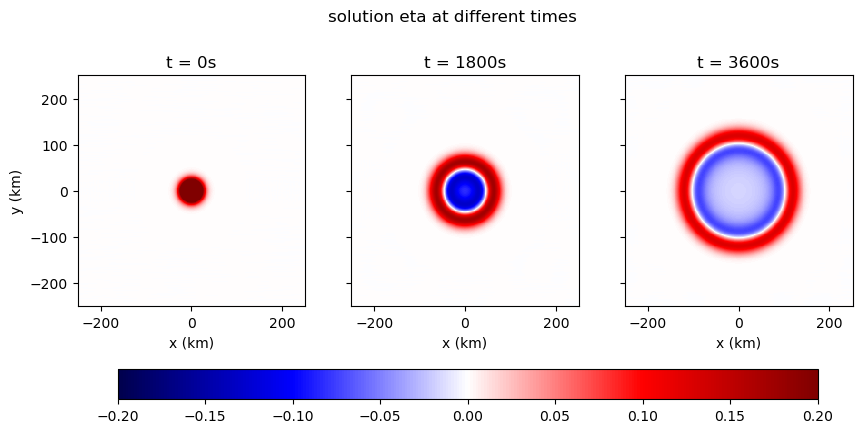

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import  fftshift,fft2, ifft2, ifftshift

# Constants
length = 500000
depth = 100
gravity = 9.81
ax = 20e3
ay = 20e3
exponent = 2

# Domain
x_coordinates = np.linspace(-length/2, length/2, 251)
y_coordinates = np.linspace(-length/2, length/2, 251)
X, Y = np.meshgrid(x_coordinates, y_coordinates)

# Initial condition
initial_function = np.exp(-(X / ax) ** exponent) * np.exp(-(Y / ay) ** exponent)

k_coordinates = 2 * np.pi * fftshift(np.fft.fftfreq(len(x_coordinates), x_coordinates[1] - x_coordinates[0]))
l_coordinates = 2 * np.pi * fftshift(np.fft.fftfreq(len(y_coordinates), y_coordinates[1] - y_coordinates[0]))
K, L = np.meshgrid(k_coordinates, l_coordinates)
omega = np.sqrt(gravity * depth * (K ** 2 + L ** 2))
transformed_function = fftshift(fft2(initial_function))

def eta(t):
    # Compute the solution in the frequency domain at time t
    Eta_kl = transformed_function * np.cos(omega * t)

    # Compute the inverse 2D FFT to obtain the solution in the spatial domain
    return np.real(ifft2(ifftshift(Eta_kl)))

# Plot
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 3), sharey=True)

time_points = [0, 1800, 3600]
for i, t in enumerate(time_points):
    eta_values = eta(t)
    color_plot = axs[i].pcolormesh(X / 1e3, Y / 1e3, eta_values, cmap='seismic', vmin=-0.2, vmax=0.2)
    axs[i].set_title(f't = {t}s')
    axs[i].set_xlabel('x (km)')
    if i == 0:
        axs[i].set_ylabel('y (km)')

# Create a colorbar with a separate axis and position it below the subplots
cbar_ax = fig.add_axes([0.165, -0.2, 0.7, 0.1])
fig.colorbar(color_plot, cax=cbar_ax, orientation='horizontal')
plt.suptitle('solution eta at different times',y=1.1 )
#plt.tight_layout()
plt.show()


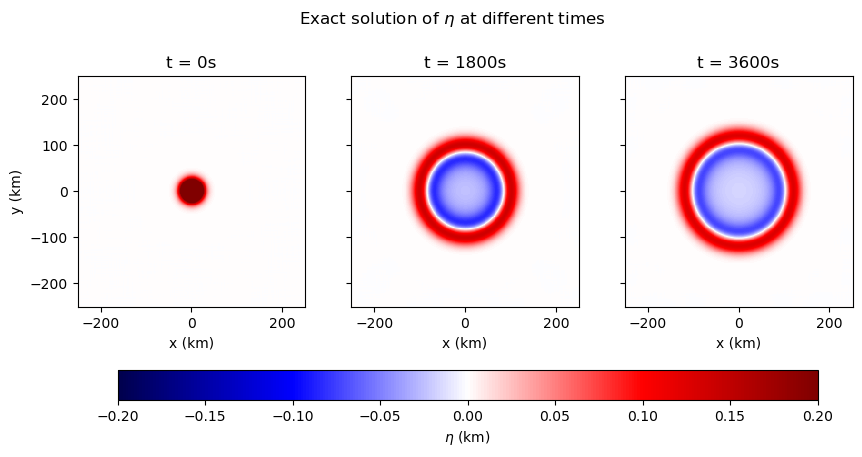

In [54]:
# Modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import  fftshift,fft2, ifft2, ifftshift
import warnings
warnings.simplefilter('ignore')

# Constants
Lx, Ly = 500000, 500000
ax, ay = 20000, 20000
dx, dy = 2000, 2000
Nx, Ny = Lx/dx, Ly/dy
m = 2
g = 9.81
H = 100
dt = 20
t = np.arange(0,3601,dt)

# Domain
x = np.arange(-250000,250000+dx,dx)
y = np.arange(-250000,250000+dx,dy)
x_grid, y_grid = np.meshgrid(x, y)

# Wavenumbers
k=2*np.pi*fftshift(np.fft.fftfreq(len(x), dx))
l=2*np.pi*fftshift(np.fft.fftfreq(len(y), dy))
k_grid, l_grid = np.meshgrid(k,l)

# Dispersion relation
omega = np.sqrt(g*H*(k_grid**2+l_grid**2))

# Initial condition
fxy = np.exp(-(x_grid / ax) ** m) * np.exp(-(y_grid / ay) ** m)
ffxy = fftshift(fft2(fxy))

# Exact solution
time_step = [0,1800,3600]
eta_timestep = np.zeros((3,len(x),len(y)))
eta_solution = np.zeros((3,len(x),len(y)))
for i in range(3):
    eta_timestep[i] = ffxy*np.cos(omega*Time_step[i])
    eta_solution[i] = np.real(ifft2(ifftshift(FEta_timestep[i])))
    
# Plot
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 3), sharey=True)

for i, t in enumerate(time_step):
    color_plot = axs[i].pcolormesh(x / 1e3, y / 1e3, eta_solution[i], cmap='seismic', vmin=-0.2, vmax=0.2)
    axs[i].set_title(f't = {t}s')
    axs[i].set_xlabel('x (km)')
    if i == 0:
        axs[i].set_ylabel('y (km)')

# Create a colorbar with a separate axis and position it below the subplots
cbar_ax = fig.add_axes([0.165, -0.2, 0.7, 0.1])
fig.colorbar(color_plot, cax=cbar_ax, orientation='horizontal', label='$\eta$ (km)')
plt.suptitle('Exact solution of $\eta$ at different times', y=1.1)
plt.show()


`NUMERICAL`

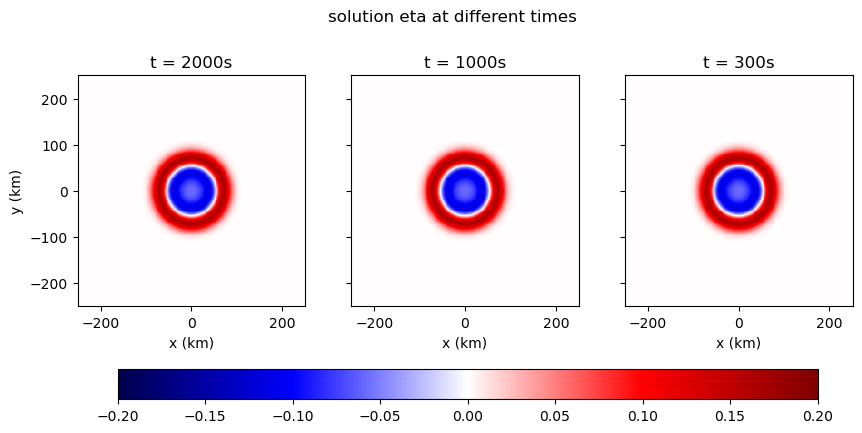

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
L = 500000
H = 100
g = 9.81
a_x = 20e3
a_y = 20e3
T=3600
m_val =2
dx = dy = 2e3
c = np.sqrt(g * H)
dt = dx / (c*np.sqrt(2 ))

Nx=int(L / dx)
Ny=int(L / dy)
Nt = int(T / dt)

time_steps = [2000, 1000, 300]

# Domain
x_vals = np.linspace(-L / 2, L / 2, Nx+1)
y_vals = np.linspace(-L / 2, L / 2, Ny+1)
X_vals, Y_vals = np.meshgrid(x_vals, y_vals)

# Initial condition
eta = np.exp(-(X_vals / a_x) ** m_val) * np.exp(-(Y_vals / a_y) ** m_val)

# Initialize grid
eta_new = np.zeros_like(eta)
eta_old = eta.copy()

def leapfrog_update(eta, eta_old):
    eta_new[1:-1, 1:-1] = 2 * eta[1:-1, 1:-1] - eta_old[1:-1, 1:-1] + \
                           c**2 * dt**2 * ((eta[:-2, 1:-1] - 2 * eta[1:-1, 1:-1] + eta[2:, 1:-1])/ dx**2 + \
                                           (eta[1:-1, :-2] - 2 * eta[1:-1, 1:-1] + eta[1:-1, 2:])/ dy**2)

    return eta_new, eta

# Plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3), sharey=True)

t_val = 0
for i, t_end in enumerate(time_steps):
    while t_val < t_end:
        eta_new, eta_old = leapfrog_update(eta, eta_old)
        eta_old = eta.copy()
        eta = eta_new.copy()
        t_val += dt


    cb = ax[i].pcolormesh(X_vals / 1e3, Y_vals / 1e3, eta, cmap='seismic', vmin=-0.2, vmax=0.2)
    ax[i].set_title(f't = {t_end}s')
    ax[i].set_xlabel('x (km)')
    if i == 0:
        ax[i].set_ylabel('y (km)')

# Create a colorbar with a separate axis and position it below the subplots
cbar_ax = fig.add_axes([0.165, -0.2, 0.7, 0.1])
fig.colorbar(color_plot, cax=cbar_ax, orientation='horizontal')
plt.suptitle('solution eta at different times',y=1.1 )
#plt.tight_layout()
plt.show()

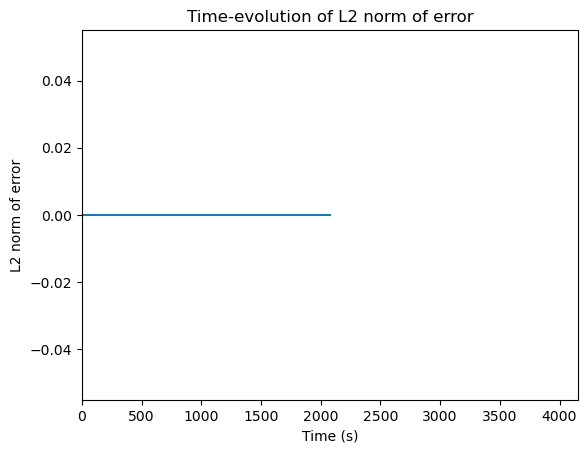

In [23]:
import numpy as np
import matplotlib.pyplot as plt

errors=[]
for n in range(Nt):

    # Compute L2 norm of error
    error = np.linalg.norm(eta[n])
    
    errors.append(error)

plt.plot(np.arange(Nt)*dt, errors)
plt.xlabel('Time (s)')
plt.ylabel('L2 norm of error')
plt.title('Time-evolution of L2 norm of error')
plt.xlim(0, (Nt+1)*dt)
plt.show()


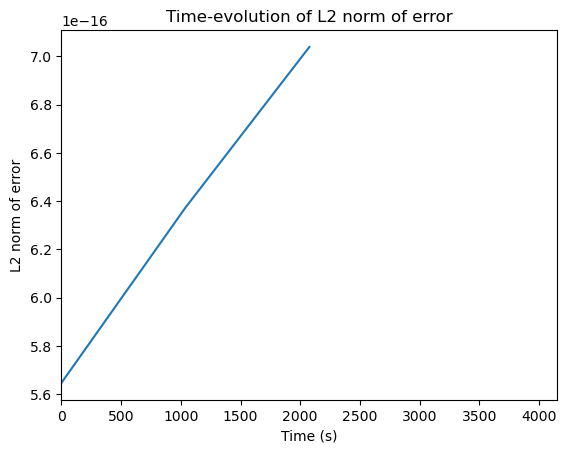

In [24]:
import numpy as np
import matplotlib.pyplot as plt

errors=[]
for n in range(Nt):

    # Compute L2 norm of error
    error = np.linalg.norm(eta_values[n])
    
    errors.append(error)

plt.plot(np.arange(Nt)*dt, errors)
plt.xlabel('Time (s)')
plt.ylabel('L2 norm of error')
plt.title('Time-evolution of L2 norm of error')
plt.xlim(0, (Nt+1)*dt)
plt.show()

In [9]:
print(errors)

[5.646739891738364e-16, 6.374990300091744e-16, 7.045831783620864e-16, 5.583619727251315e-16, 4.450597766098522e-16, 7.027145138554752e-16, 6.018971535548338e-16, 5.086197672534566e-16, 1.2047888412083856e-15, 4.104578366574294e-15, 1.2209960980806891e-14, 3.610036626264253e-14, 1.0378062318164446e-13, 2.903403406853057e-13, 7.956374013337191e-13, 2.1400347671462085e-12, 5.646798583613228e-12, 1.461724981918639e-11, 3.712467597665503e-11, 9.250288004546682e-11, 2.2610980233589986e-10, 5.421602458863707e-10, 1.2751267752423953e-09, 2.941498316734263e-09, 6.654965500895169e-09, 1.4765817593776441e-08, 3.212742176763039e-08, 6.854456438360047e-08, 1.4339065059035781e-07, 2.9409724099922064e-07, 5.913637423890641e-07, 1.1656898156498934e-06, 2.252404221147013e-06, 4.265938109797673e-06, 7.918753000521727e-06, 1.4405930907767812e-05, 2.568238309887927e-05, 4.486468677048833e-05, 7.679157252869831e-05, 0.00012877288473906408, 0.000211542303637435, 0.000340399670924793, 0.0005364803747647874, 

In [12]:
print(errors)

[5.646739891738364e-16, 6.372985073108381e-16, 7.039035937359544e-16, 5.590853515047622e-16, 4.442296482256674e-16, 6.959371797884736e-16, 6.096791099959683e-16, 7.084548558353738e-16, 7.746177876912429e-16, 8.528971458637458e-16, 2.2352266986967135e-15, 6.0890168272912815e-15, 1.7702042366244318e-14, 5.333848588993821e-14, 1.5919440116616322e-13, 4.648434573698744e-13, 1.3305092880445677e-12, 3.730087672417895e-12, 1.023206366828739e-11, 2.7459246546162348e-11, 7.2076970183948e-11, 1.8512131409300418e-10, 4.671614299068135e-10, 1.1803354560043565e-09, 3.110488956992044e-09, 8.471928744393429e-09, 2.4570050820402314e-08, 1.7676924194811996e-07, 1.4863583652795386e-06, 1.0108298866419542e-05, 5.8827819933547014e-05, 0.00030490905775875564, 0.0014362359129678763, 0.006177600610002855, 0.023952623916505003, 0.08052118257384554]


In [4]:
error = np.sqrt(np.sum((eta_values-eta)**2))

In [5]:
np.linalg.norm(eta_values-eta)

2.2119746504768823e+28

In [6]:
errors = np.linalg.norm(eta_values-eta)

In [7]:
errors

2.2119746504768823e+28

In [8]:
# Compute exact solution at each time step
exact_solution = np.zeros((len(time_steps), Nx+1, Ny+1))
for i, t in enumerate(time_steps):
    eta_valuess = eta_values(t)
    exact_solution[i, :, :] = eta_valuess[:-1, :]

# Compute L2 norm of error at each time step
error_list = []
for i, t in enumerate(time_steps):
    numerical_solution = eta_new[:-1, :]
    error = np.linalg.norm(exact_solution[i, :, :] - numerical_solution)
    error_list.append(error)

# Plot time evolution of L2 norm of error
plt.plot(time_steps, error_list)
plt.xlabel('Time (s)')
plt.ylabel('L2 Norm of Error')
plt.title('Time Evolution of L2 Norm of Error')
plt.show()


TypeError: 'numpy.ndarray' object is not callable